In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
os.chdir('C:\\Users\\HP\\Desktop\\PYTHON AND DATA SCIENCE - Copy')

In [15]:
dataset=pd.read_csv('clustering_data.csv')

In [16]:
dataset

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [17]:
x = dataset.iloc[:,1:].values

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [19]:
x

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

([<matplotlib.lines.Line2D at 0x28c43dd86a0>],)

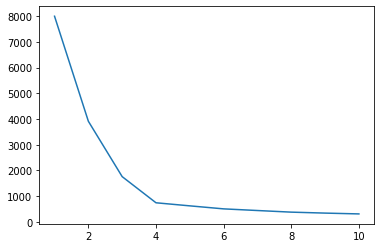

In [26]:
plt.plot(range(1,11),wcss),

In [27]:
wcss

[8000.0,
 3911.926390428416,
 1756.544582131428,
 739.1534508645581,
 619.4282410625347,
 502.0613364792458,
 437.8780702842313,
 374.7961444203448,
 337.3552080273271,
 305.67293105497254]

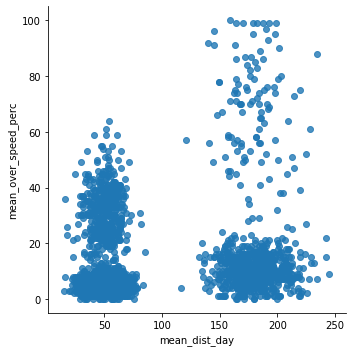

In [28]:
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc',data=dataset,fit_reg=False)


In [29]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(x)

In [30]:
y_kmeans

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,1
1,3423313212,52.53,25,1
2,3423313724,64.54,27,1
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
5,3423313857,41.91,10,4
6,3423312432,58.64,20,1
7,3423311434,52.02,8,4
8,3423311328,31.25,34,2
9,3423312488,44.31,19,1


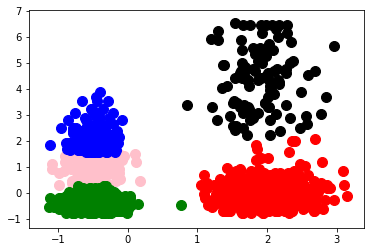

In [35]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='pink')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='black')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='green')

In [38]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_kmeans))

0.7341393562942123


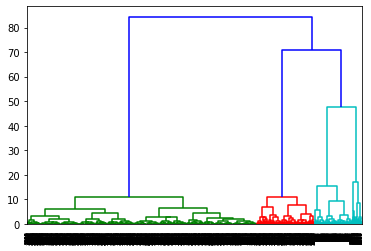

In [39]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))

In [41]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)

In [42]:
y_hc

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [43]:
pd.concat([dataset,pd.DataFrame(y_hc)],axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
5,3423313857,41.91,10,1
6,3423312432,58.64,20,0
7,3423311434,52.02,8,1
8,3423311328,31.25,34,0
9,3423312488,44.31,19,0


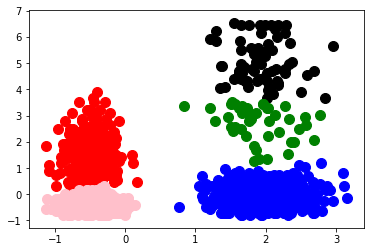

In [45]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='pink')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='blue')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='black')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='green')

In [46]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_hc))

0.7762594607264451
